In [49]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
#read file with extra features
df = pd.read_csv('nifty1.csv')
#read file with Training and Testing data
df_ = pd.read_csv('Nifty_Techathlon_converted_prks.csv')['Close']

In [71]:
closing_array_ = np.array(df)
#split ratio for training and testing data
split_ratio = 0.7
data = closing_array_[:,1:]
y = data[:,0:1]
y = np.roll(y, shift=-1)
x_train = data[:int(0.7*len(data)),:]
y_train = y[:int(0.7*len(data)),:]
x_test = data[int(0.7*len(data)):,:]
y_test = y[int(0.7*len(data)):,:]

In [72]:
#Initialize a Linear regression model and fit to Train data
model = LinearRegression().fit(x_train, y_train)

In [73]:
#R^2 Value for the predictions
model.score(x_test,y_test)

0.9986443280636392

55800

(39060, 7)

(16740, 7)

(39060, 1)

(16740, 1)

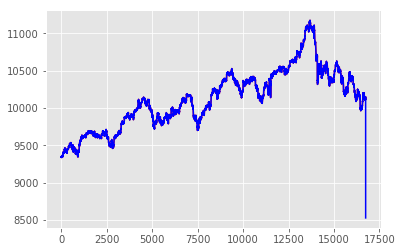

In [225]:
#import plotting library for visulising preditions vs actual data

import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.figure(figsize=(10,10))
plt.plot(model.predict(x_test),'r')
plt.plot(y_test,'b')
#plt.xlim([9200,9500])
#plt.ylim([10400,10450])
plt.show()

In [317]:
#Action Space
actions = ['Buy', 'Sell', 'Sit']
action_nums = [-1, 1, 0]

#Get predicted Values for stock
predicted_array = np.array(model.predict(x_test))

#Function for calculating Sharp Value for given market environment and our actions
def sharpe(close,action):
    returns = np.ones(len(close))
    for i in range(1,len(close)):
        returns[i-1] = (close[i]-close[i-1])*action[i-1]/close[i-1]
    return returns.mean()/returns.std()


#Function to get Sharpe Value as a parameter of threshold
def get_sharpe(threshold,close_):

    actions_ = []
    for i in range(1,len(predicted_array)):
        if((predicted_array[i][0]-predicted_array[i-1][0])/predicted_array[i-1][0] > threshold):
            actions_.append(1)
        elif((predicted_array[i][0]-predicted_array[i-1][0])/predicted_array[i-1][0] < -1*threshold):
            actions_.append(-1)
        else:
            actions_.append(0)
    actions_.append(0)        
    actions_ = np.array(actions_)
    #print(actions_)
    return sharpe(close_,actions_),actions_
    
    

In [320]:
#Shift Closing price array by one so that we can have Sharpe Value
closing_ = np.roll(y_test,shift=1)
sharpe_, action = get_sharpe(0.0000763,closing_)
print((sharpe_))


0.0633302729550708


In [321]:
#Our Method to select an optimum threshold value
max_sharpe = 0

for i in range(1,10000):
    now_sharpe, actions_ = get_sharpe(i*0.0001,closing_)
    if( now_sharpe > max_sharpe):
        max_sharpe = now_sharpe
        print(max_sharpe)
    

0.06277194728881369


KeyboardInterrupt: 